In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# From Feb 11, 2024

## Goal

Collect a bit of real data that you would need/want to solve a specific problem.

## Steps


1. What feature data do you have/need?
2. What target data do you have/need?

In my research, I aim to train a **machine learning interatomic potential** for **molten salt**, specifically **FLiBe**. To train a high-quality potential, we need essential data that include **atomic positions and corresponding energies**. These can be primarily obtained from **DFT calculations**. 

However, when investigating the **Primary Knock-on Atom (PKA) process**, DFT alone is insufficient due to computational limitations. Therefore, **AIMD simulations** are necessary to supplement the dataset. AIMD can provide additional configurations and dynamical information that are difficult to capture using only static DFT calculations.

By integrating data from **DFT** and **AIMD**, we can construct a robust dataset that enhances the **accuracy and generalizability** of the machine learning interatomic potential. This approach is particularly crucial for studying **PKA-related processes** in molten salt systems.  

Currently, we have 90,000 frames in total.



In [25]:
## Data exploration exercise

get data from Kaggle

SyntaxError: invalid syntax (597782571.py, line 3)

In [ ]:
! cd /Users/wleng2/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/Notability/MSE/598
! curl -L -o yeah-concret-data.zip https://www.kaggle.com/api/v1/datasets/download/maajdl/yeh-concret-data
! unzip yeah-concret-data.zip


now you can see

| cement | slag  | flyash | water | superplasticizer | coarseaggregate | fineaggregate | age | csMPa |

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

Concrete_Data_Yeh.csv README.md             yeah-concret-data.zip
Feb11-13.ipynb        Untitled.ipynb
LICENSE               class_last_time.ipynb


In [ ]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [ ]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

In [ ]:
df.cement.max()

540.0

In [ ]:
df['Add_Random'] = np.random.rand(len(df))

In [ ]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453


In [ ]:
df['water_add_Random'] = df['water'] + df['Add_Random']    

In [ ]:
df.head()   

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random,water_add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687,162.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826,162.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922,228.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058,228.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453,192.874453


In [ ]:
df['age']>100

0       False
1       False
2        True
3        True
4        True
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: age, Length: 1030, dtype: bool

In [ ]:
df['water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [ ]:
df.head()   

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df['csMPa'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64

# plotting

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
y = df['csMPa']
x1 = df['water']
x2 = df['Add_Random']

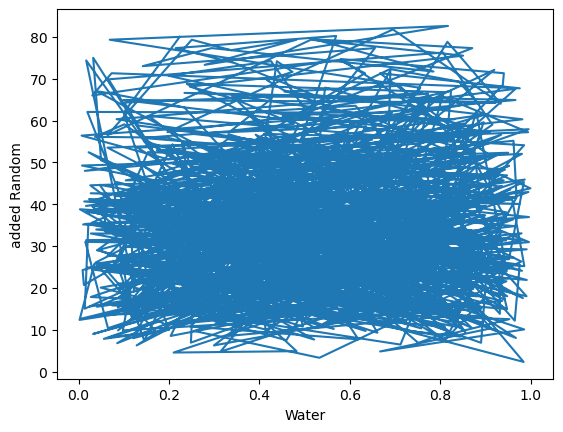

In [ ]:
plt.xlabel('Water')
plt.ylabel('added Random')
plt.plot(x2, y)


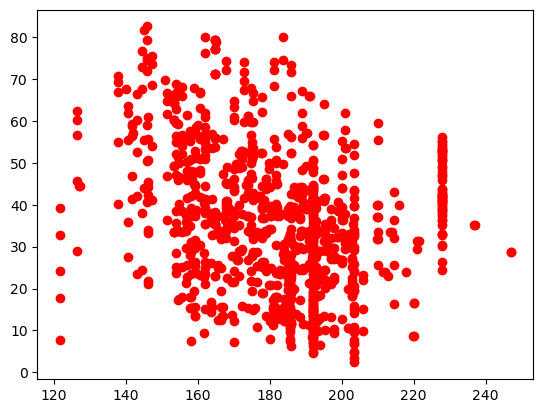

In [ ]:
plt.scatter(x1, y,c='r')

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

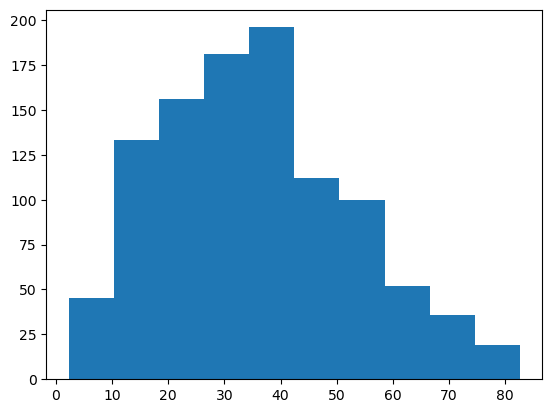

In [ ]:
plt.hist(df['csMPa'])

In [ ]:
import seaborn as sns

<Axes: xlabel='csMPa', ylabel='Count'>

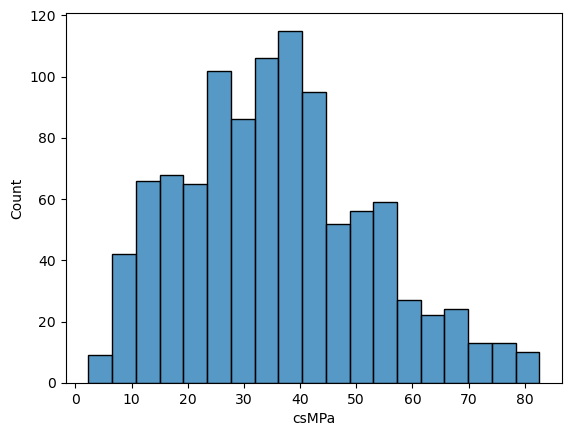

In [ ]:
sns.histplot(df['csMPa'])

<Axes: xlabel='age', ylabel='Count'>

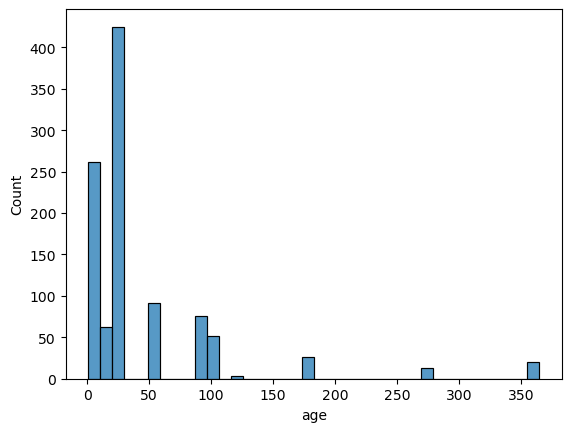

In [ ]:
sns.histplot(df['age'])

In [ ]:
df.age

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: age, Length: 1030, dtype: int64

<Axes: >

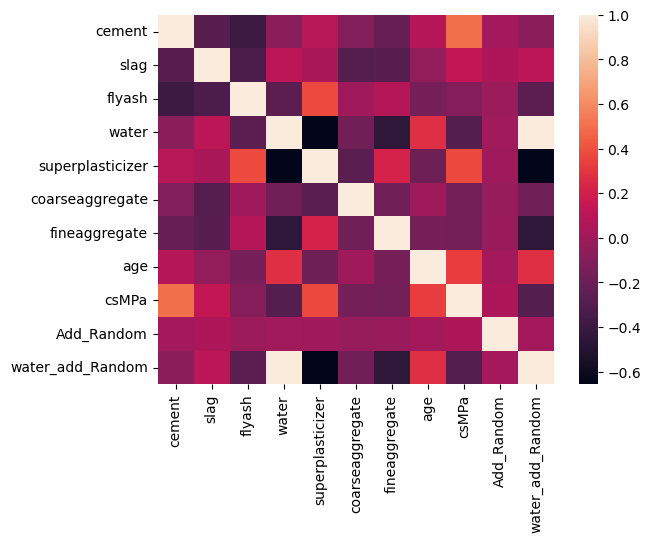

In [ ]:
sns.heatmap(df.corr())

<Axes: >

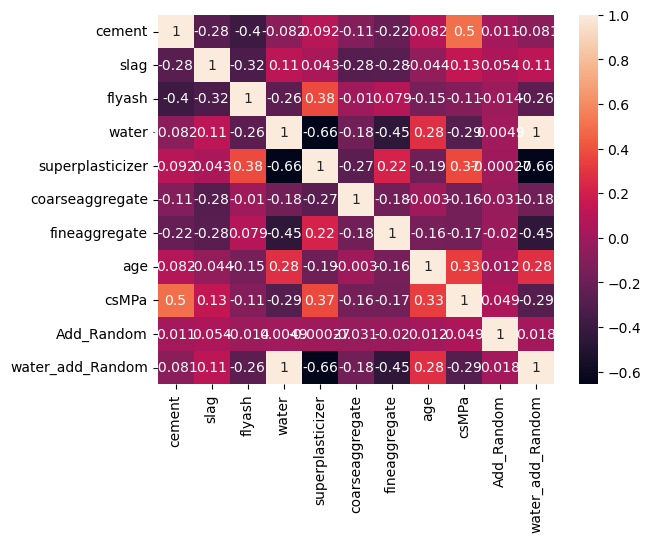

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.hls_palette()

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

In [ ]:
sns.husl_palette()

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

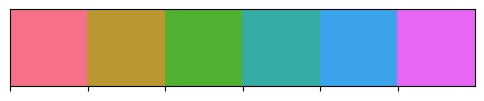

In [ ]:
sns.palplot(sns.husl_palette())

## Feb 18
### Test/Validation Split Exercise
goal: produce test/validation splits with the scikit-learn library

In [ ]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Add_Random,water_add_Random
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.223687,162.223687
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.099826,162.099826
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.165922,228.165922
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.663058,228.663058
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.874453,192.874453
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.208988,179.808988
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.312731,196.312731
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.476594,193.176594
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.076272,175.676272


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
np.random.seed(123456)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [ ]:
df['math_model'] =  0.5 * df['water'] * df['cement'] - df['age'] * df['age'] + df['fineaggregate']+df['coarseaggregate']

base = ['superplasticizer', 'flyash', 'age']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse = np.sqrt(np.mean((y_pred - y_train) ** 2))
print("Train RMSE:", rmse)


Train RMSE: 13.565308363360472


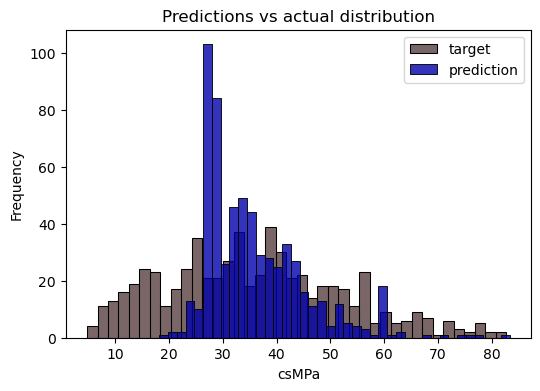

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()


In the code above:
- 選擇water，spilt into test and validation， rate = 0.8， 然後用linear regression 去找這個權重w ，再用妳合出來的mdoel去和validation比較

# Feb 25,2024
## LASSO Method

Train RMSE: 13.565308363360472


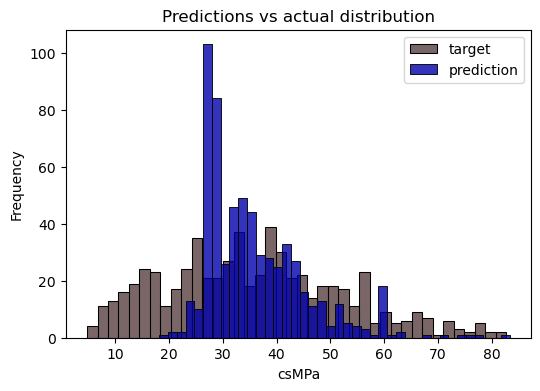

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
np.random.seed(123456)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
df['math_model'] =  0.5 * df['water'] * df['cement'] - df['age'] * df['age'] + df['fineaggregate']+df['coarseaggregate']

base = ['superplasticizer', 'flyash', 'age']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse = np.sqrt(np.mean((y_pred - y_train) ** 2))
print("Train RMSE:", rmse)
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()


Train RMSE: 10.519
Test RMSE: 9.796


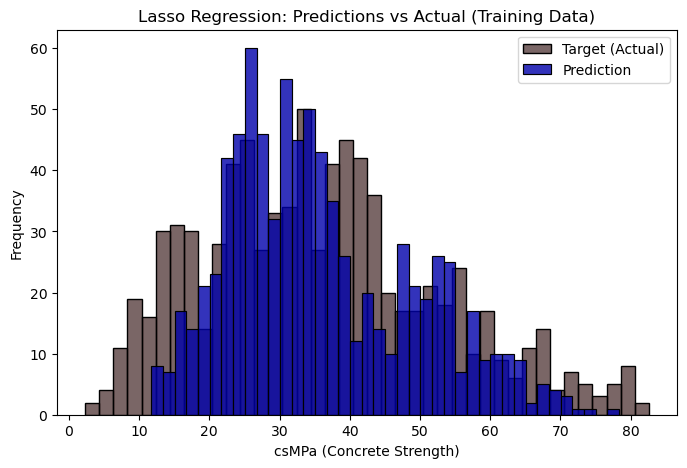

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')

X = df.drop(columns=['csMPa'])  
y = df['csMPa'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  #
lasso.fit(X_train, y_train)

# 預測
y_pred_train = lasso.predict(X_train) 
y_pred_test = lasso.predict(X_test)  

# 計算 RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")

plt.figure(figsize=(8, 5))
sns.histplot(y_train, label="Target (Actual)", color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred_train, label="Prediction", color='#0000aa', alpha=0.8, bins=40)

plt.legend()
plt.xlabel("csMPa (Concrete Strength)")
plt.ylabel("Frequency")
plt.title("Lasso Regression: Predictions vs Actual (Training Data)")
plt.show()


📌 **Model Performance:**
Linear Regression RMSE: 10.556
Lasso Regression RMSE: 10.521 (Regularized)


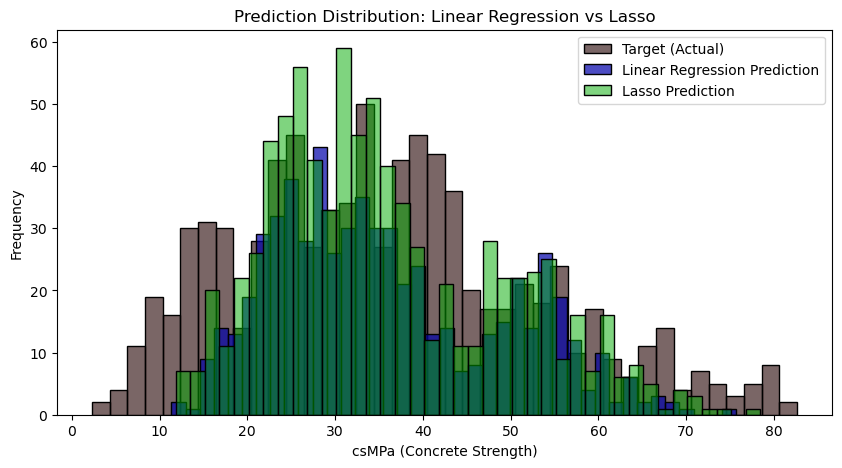

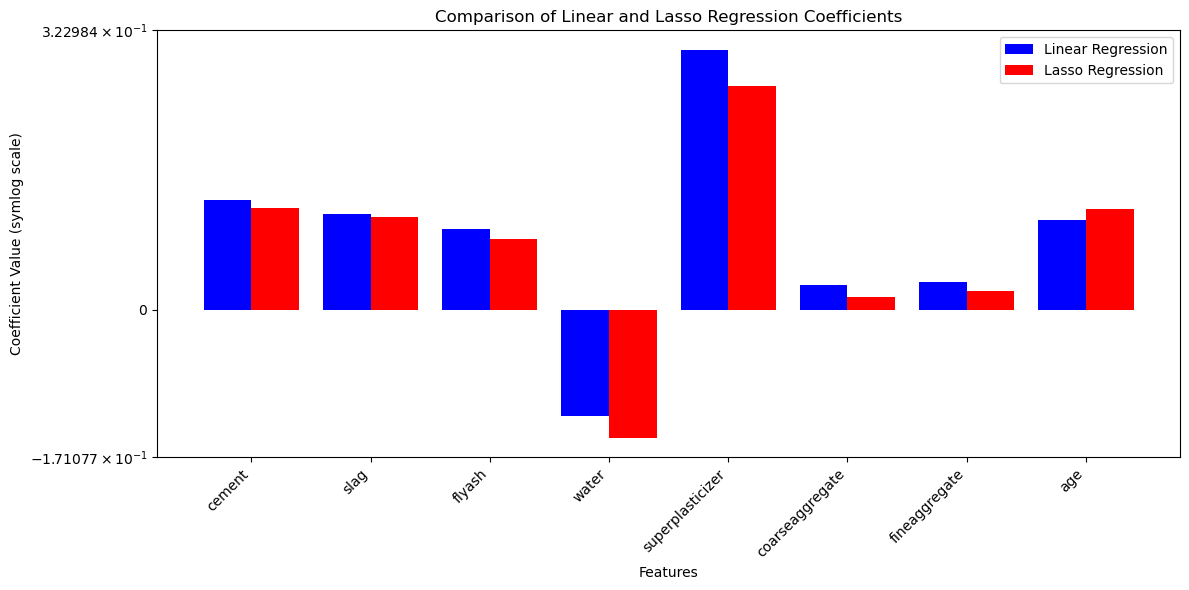


📌 **Lasso Coefficients (Feature Importance):**
superplasticizer    0.258520
cement              0.117852
age                 0.116033
slag                0.107055
flyash              0.081350
fineaggregate       0.021933
coarseaggregate     0.014992
water              -0.148620
dtype: float64


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **Step 1: Load Data**
df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')

# **Step 2: Define Features and Target Variable**
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# **Step 3: Split Data (80% Train, 20% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 4: Train Lasso Regression Model**
lasso = Lasso(alpha=0.8)  # Adjust alpha for stronger/weaker L1 regularization
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_train)

np.random.seed(123456)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

y_train_lr = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

# **Define Linear Regression Training Function**
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # Add bias term
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

# Ensure same features are used in both models
base = X.columns.tolist()

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# **Prepare Training Data for Linear Regression**
X_train_lr = prepare_X(df_train)
w_0, w = train_linear_regression(X_train_lr, y_train_lr)
y_pred_lr = w_0 + X_train_lr.dot(w)

# **Step 6: Compute RMSE (Root Mean Squared Error)**
rmse_linear = np.sqrt(mean_squared_error(y_train_lr, y_pred_lr))
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))

print(f"\n📌 **Model Performance:**")
print(f"Linear Regression RMSE: {rmse_linear:.3f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.3f} (Regularized)")

# **Step 7: Compare Prediction Distributions**
plt.figure(figsize=(10, 5))
sns.histplot(y_train, label="Target (Actual)", color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred_lr, label="Linear Regression Prediction", color='#0000aa', alpha=0.7, bins=40)
sns.histplot(y_pred_lasso, label="Lasso Prediction", color='#00aa00', alpha=0.5, bins=40)

plt.legend()
plt.xlabel("csMPa (Concrete Strength)")
plt.ylabel("Frequency")
plt.title("Prediction Distribution: Linear Regression vs Lasso")
plt.show()

# **Step 8: Compare Feature Importance (Linear vs Lasso)**
lasso_coefficients = pd.Series(lasso.coef_, index=base)
linear_coefficients = pd.Series(w, index=base)

features = lasso_coefficients.index  
x = np.arange(len(features))         


plt.figure(figsize=(12, 6))

bar_width = 0.4 
plt.bar(x - bar_width/2, linear_coefficients, width=bar_width, label="Linear Regression", color="blue")
plt.bar(x + bar_width/2, lasso_coefficients, width=bar_width, label="Lasso Regression", color="red")

plt.xticks(x, features, rotation=45, ha="right")  
plt.xlabel("Features")
plt.ylabel("Coefficient Value (symlog scale)")  
plt.yscale("symlog")  #
plt.title("Comparison of Linear and Lasso Regression Coefficients")
plt.legend()

plt.tight_layout()
plt.show()

print("\n📌 **Lasso Coefficients (Feature Importance):**")
print(lasso_coefficients.sort_values(ascending=False))

In [46]:
# data prep,
df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df['goodconcrete']=(df.csMPa>40).astype(int)
del df['csMPa']
df['flyash']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1025     90.3
1026    115.6
1027    108.6
1028      0.0
1029     78.3
Name: flyash, Length: 1030, dtype: float64

In [48]:
global_mean = np.mean(y_pred_lasso)
print(round(global_mean, 2))

35.86


In [ ]:
flyyes mean = df train full[df train full.flyash'yes'].goodconcrete.mean( )print('flyash == yes:', round(flyyes_mean，3))
flyno_mean = df_train_full[df_train_full.flyash == 'no'].goodconcrete.mean()print('flyash ==no: ',round(flyno_mean,3))      

SyntaxError: invalid character '，' (U+FF0C) (3502526453.py, line 1)

## For Mar 25

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Concrete_Data_Yeh.csv')
target = df.csMPa.values

In [3]:
del df['csMPa']

In [4]:
X = df.values
X.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [5]:
from sklearn.decomposition import PCA # within the scikit-learn module which focuses on
                                      # Machine Learning in Python, we import PCA decomposition algorithm
pca8 = PCA(n_components=8)            # applies PCA with the argument that we want a two-component fit
pca8.fit(X_scaled)                           # fits the PCA model with dataset X defined above
print(pca8)                          # this is only the PCA object!
X_pca8 = pca8.transform(X_scaled)

# The fit learns some quantities from the data, namely the "components" and "explained variance"
# In this example, there are two sets of components to be described below

print('components: ' + str(pca8.components_))                 # each component defined by x-y pair
print('explained variance: ' + str(pca8.explained_variance_)) # how much variance each component explains 
                                                              # taking into consideration the entire dataset
print('cummulative explained variance: ' + str(round(sum(pca8.explained_variance_),3)))
print('ratio: ', sum(pca8.explained_variance_ratio_ * 100))

PCA(n_components=8)
components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]
explained variance: [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]
cummulative explained variance: 8.008
ratio:  100

In [6]:
np.cumsum(pca8.explained_variance_ratio_ * 100)

array([ 28.50124202,  46.20217702,  62.95316494,  75.6301508 ,
        87.52400072,  97.40144413,  99.62446526, 100.        ])

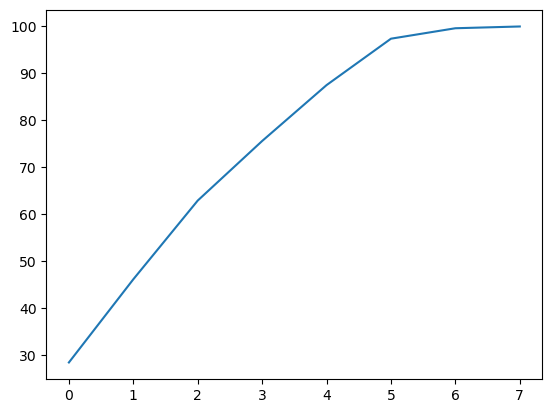

In [7]:
plt.plot(np.cumsum(pca8.explained_variance_ratio_ * 100))

<Axes: >

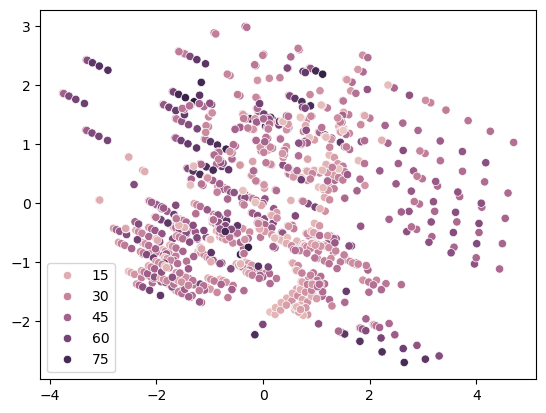

In [8]:
pca2 = PCA(n_components=2)            # applies PCA with the argument that we want a two-component fit
pca2.fit(X_scaled)                           # fits the PCA model with dataset X defined above
X_pca2 = pca2.transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0],y=X_pca2[:,1],hue=target)

In [9]:
print('components: ' + str(pca2.components_))

components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]]


## Mar 27

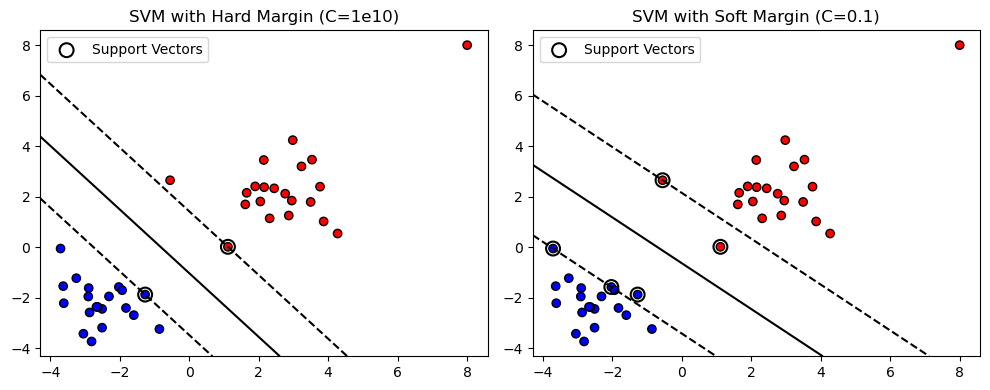

In [3]:

## Test Two- Dimensional Data for Support Vector Machine (SVM) Classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X1 = np.random.randn(20, 2) + [2, 2]   # 類別 +1
X2 = np.random.randn(20, 2) + [-2, -2] # 類別 -1
X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), -1*np.ones(20)))

# 2. add outlier
X = np.vstack([X, [8, 8]])
y = np.append(y, 1)

# 3. set two SVM 
clf_hard = svm.SVC(kernel='linear', C=1e10)
clf_soft = svm.SVC(kernel='linear', C=0.1)

clf_hard.fit(X, y)
clf_soft.fit(X, y)


def plot_svm(ax, clf, title):
    ax.set_title(title)    

    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # hyperplane
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 200),
                         np.linspace(*ylim, 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # hyperplane + margin
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5,
               label="Support Vectors")
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_svm(axs[0], clf_hard, "SVM with Hard Margin (C=1e10)")
plot_svm(axs[1], clf_soft, "SVM with Soft Margin (C=0.1)")
plt.tight_layout()
plt.show()

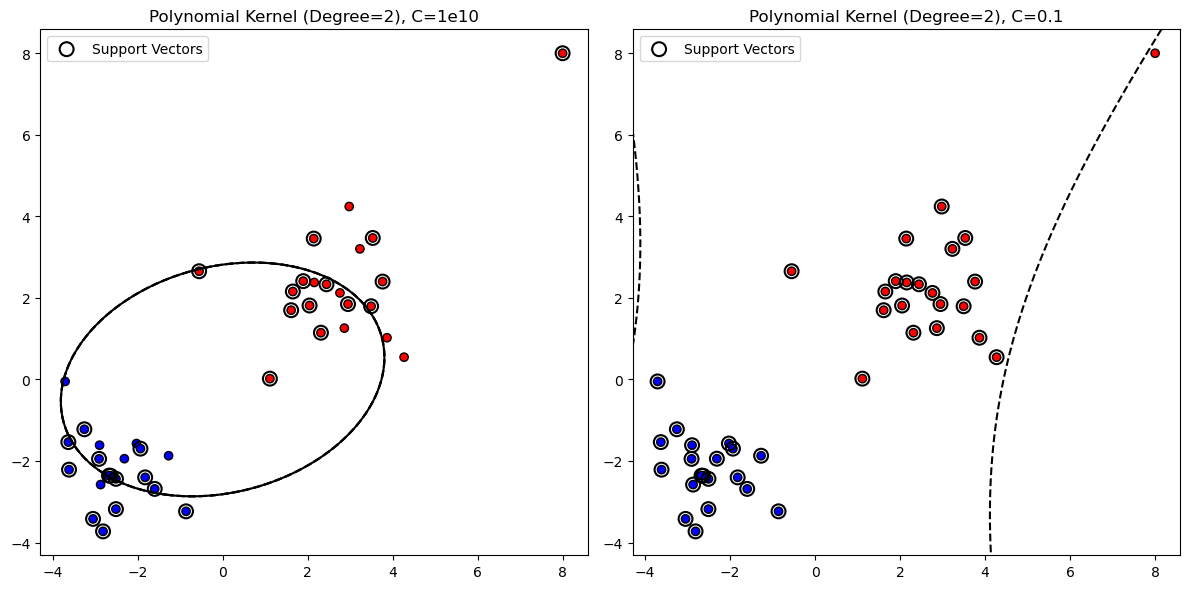

In [18]:
## now try the above with polynomial kernel

clf_poly_hard = svm.SVC(kernel='poly', degree=2, C=1e10)
clf_poly_soft = svm.SVC(kernel='poly', degree=2, C=0.1)

clf_poly_hard.fit(X, y)
clf_poly_soft.fit(X, y)

def plot_svm(ax, clf, title):
    ax.set_title(title)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # hyperplane
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 200),
                         np.linspace(*ylim, 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 畫邊界和 margin
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5,
               label="Support Vectors")
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_svm(axs[0], clf_poly_hard, "Polynomial Kernel (Degree=2), C=1e10")
plot_svm(axs[1], clf_poly_soft, "Polynomial Kernel (Degree=2), C=0.1")
plt.tight_layout()
plt.show()


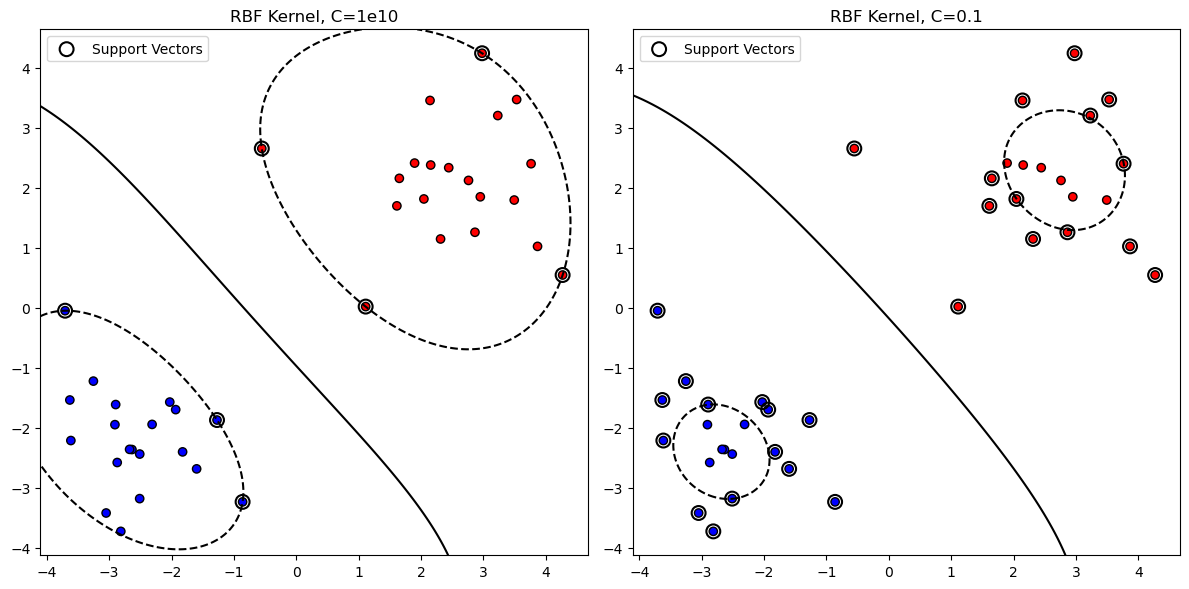

In [4]:
## if we delete the outlier, we can see the difference between hard and soft margin
X = np.vstack((X1, X2))  # Remove the outlier
y = np.hstack((np.ones(20), -1*np.ones(20)))
## SVM with RBF kernel
clf_rbf_hard = svm.SVC(kernel='rbf', C=1e10)
clf_rbf_soft = svm.SVC(kernel='rbf', C=0.1)
clf_rbf_hard.fit(X, y)
clf_rbf_soft.fit(X, y)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_svm(axs[0], clf_rbf_hard, "RBF Kernel, C=1e10")
plot_svm(axs[1], clf_rbf_soft, "RBF Kernel, C=0.1")
plt.tight_layout()
plt.show()

In [1]:
## Apr 1, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
np.random.seed(123456)

In [2]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: xlabel='goodconcrete', ylabel='Count'>

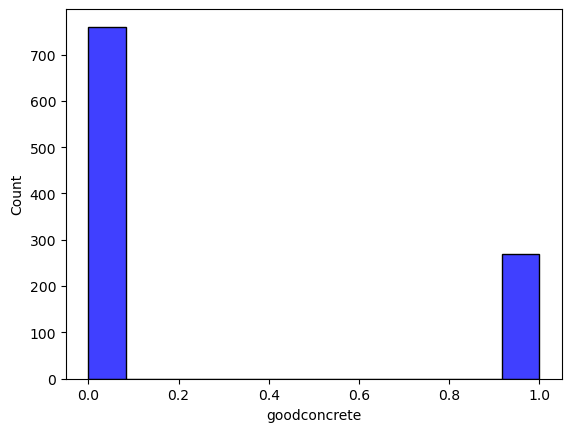

In [15]:
df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df['goodconcrete']=(df.csMPa>45).astype(int)
sns.histplot(df['goodconcrete'], color='blue', kde=False)